# Data exploration and data visualisation of medical claims data

_By Mark J. Hantic_

As a follow-up to the 'Utilisation Report - Automation Module,' this next module will focus on the visualisation of the data exploration results, which will be crucial for creating a comprehensive dashboard.

---

### A. Importing libraries and exploring the data
#### 1. First, we have to install the following libraries in order to read our excel file:
- <code>Pandas</code> is a software library for the Python programming language that provides tools for data manipulation and analysis, including functions for reading and writing data in various formats, filtering and aggregating data, and plotting and visualising data.

- <code>Matplotlib</code> is a popular data visualization library for Python. It provides a wide range of tools for creating static, animated, and interactive visualizations in Python.

- <code>Seaborn</code> is a Python data visualization library that is built on top of Matplotlib. It provides a higher-level interface for creating more complex and aesthetically pleasing visualizations than Matplotlib, while still retaining the low-level control of Matplotlib.

In [1]:
# pip install pandas matplotlib seaborn

#### 2. Import the necessary libraries and read the Excel file into a DataFrame:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import locale

#### 3. Perform preliminary data exploration and data cleaning to prepare for analysis.

**The following steps were taken to explore and clean the data:**

- Read the data from an Excel file 'krusty_krab.xlsx' and create a Pandas DataFrame using <code>pd.read_excel()</code>.
- Print the first five rows of the DataFrame using <code>df.head()</code>.
- Print the shape of the DataFrame using <code>df.shape</code>.
- Drop several unnecessary columns from the DataFrame using <code>df.drop(columns=[])</code>.
- Print the first five rows of the DataFrame again using <code>df.head()</code>.
- Define start and end dates as datetime objects, and format them as strings using <code>strftime()</code>.
- Create a new 'Date' column in the DataFrame using <code>where()</code> to choose between two different date columns based on the value of another column.
- Create a new 'MEMBER TYPE' column in the DataFrame using conditional logic on the 'DEPENDENTS' column.
- Create a new 'Patient ID' column in the DataFrame using <code>where()</code> to choose between two different columns based on the value of another column.
- Create a new 'Transaction Type' column in the DataFrame using <code>where()</code> to choose between two different values based on the value of another column.
- Select a subset of the data within a specific date range using <code>df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]</code>.
- Remove any rows where the 'CLAIM STATUS' column is 'denied' using <code>df = df[df['CLAIM STATUS'] != 'denied']</code>.
- Remove any rows with missing values in the 'CLAIM AMOUNT' column using <code>df.dropna(subset=['CLAIM AMOUNT'])</code>.

In [3]:
df = pd.read_excel('krusty_krab.xlsx')
df.head()
df.shape

(1672, 30)

In [4]:

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['APPROVE DATE', 'DATE DENIED','PROCESSED DATE','PAYORLINK NO.',
                      'TAX RATE','TAX AMOUNT','PAYABLE AMOUNT','GGD REFERENCE NO',
                     'MEMBER EXCESS','DATE PAID','CHECK NUMBER','DATE OF POSTING',
                     'APPROVER','PROCESSOR','PLAN TYPE'])
df.head()

,POLICY,CLIENT NAME,PLAN CODE,DEPENDENTS,CERT NO.,ILLNESS DATE,RECEIVED DATE,PAYEE NAME,CLAIM NO,CLAIM TYPE,CLAIM AMOUNT,CLAIM STATUS,ILLNESS,REMARKS,PAYEE TYPE
0,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,252,2022-05-15,2022-05-25,CHINESE GENERAL HOSPITAL INC.,624924,INPATIENT,38042.76,PAID,"Amenorrhoea, unspecified",NaN,HOSPITAL
1,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,444,2022-03-12,2022-03-22,HEALTHWAY MEDICAL CLINIC-ALABANG TOWN CENTER,613386,OUTPATIENT,3200.00,PAID,"Otitis externa, unspecified",NaN,HOSPITAL
2,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,801,2022-04-01,2022-04-13,MEDICAL CLINIC-RCBC,614535,OUTPATIENT,550.00,PAID,"Endometriosis, unspecified",network availment,HOSPITAL
3,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,388,234,2022-08-10,2022-09-01,"BACOOR DOCTORS MEDICAL CENTER INC.,",643238,OUTPATIENT,4749.00,PAID,Hypertensive heart disease without (congestive...,NaN,HOSPITAL
4,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,705,2022-06-02,2022-07-04,HEALTHWEALTH MEDICAL SPECIALIST,630657,OUTPATIENT,725.00,PAID,"Urinary tract infection, site not specified",NaN,HOSPITAL


In [6]:
start_date = datetime(2021, 11, 1)
end_date = datetime(2022, 10, 31)

start_date_str = start_date.strftime("%B %d, %Y")
end_date_str = end_date.strftime("%B %d, %Y")

In [7]:
df['Date'] = df['RECEIVED DATE'].where(df['PAYEE TYPE'] == 'REIMBURSEMENT', df['ILLNESS DATE'])
df['MEMBER TYPE'] = ['Principal' if pd.isna(dependent) else 'Dependent' for dependent in df['DEPENDENTS']]
df['Patient ID'] = df['CERT NO.'].where(df['MEMBER TYPE'] == 'Principal', df['DEPENDENTS'])
df['Transaction Type'] = df['PAYEE TYPE'].where(df['PAYEE TYPE'] == 'REIMBURSEMENT', other='NETWORK')

In [8]:
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df = df[df['CLAIM STATUS'] != 'denied']
df = df.dropna(subset=['CLAIM AMOUNT'])

In [9]:
df.shape

(1628, 19)

### B. Extracting company and policy Information, and capturing extraction date

**To extract the company name and date, the following steps are performed:**

- Retrieve the name of the company from the 'CLIENT NAME' column and the policy number from the 'POLICY' column of a Pandas DataFrame df using iloc.
- Get the current date using <code>datetime.now()</code>.
- Format the current date as a long date string using <code>strftime()</code>.
- Concatenate the long date string with the "Date extracted: " string using an f-string to create a new string variable date_extracted that indicates the date the data was extracted. This variable could be useful for adding metadata or context to data extractions or reports.

In [10]:
company_name = df.iloc[0]['CLIENT NAME']
policy_num = df.iloc[0]['POLICY']

# Get the current date
now = datetime.now()

# Format the date as a long date
date_formatted = now.strftime('%B %d, %Y')

# Concatenate the date with the "Date extracted: " string
date_extracted = f"Date extracted: {date_formatted}"

date_extracted

'Date extracted: February 22, 2023'

In [11]:
print(company_name)
print(policy_num)
print(f"{start_date_str} to {end_date_str}")
print(date_extracted)

THE KRUSTY KRAB (MEDICAL)
2021213-00
November 01, 2021 to October 31, 2022
Date extracted: February 22, 2023


### C. Performing data summarisation and creating visualisations

**1. Aggregating amounts by type and creating a summary dataframe**
- Perform a grouping operation of a Pandas DataFrame by a specified category column:
<br><br>
    - To generate a summary of numerical data in a <code>Pandas DataFrame</code>, we will need to group the data by a specified column using <code>groupby()</code> and compute the sum of a specified numerical column for each group using <code>sum()</code>. After calculating the total sum of all the numerical values, we will concatenate the result with a new Pandas Series that includes the total sum under a specified label. This will produce a new summary <code>DataFrame</code> with two columns: the category column and the numerical sum column, and one row for each unique category plus one row for the total. This process of grouping and summarizing the data can be useful in providing an overview of the data and identifying trends or patterns that might not be immediately visible in the raw data.
<br><br>
- Summarising data in a Pandas DataFrame with a formatted chart, for use in creating a dashboard:
<br><br>
    - To summarise the distribution and relative magnitudes of different categories in a <code>Pandas DataFrame</code>, we will need to prepare the data by mapping category labels to colors using a specified color dictionary. Once the data is formatted, we will use <code>matplotlib</code> to create a chart that presents the data in an intuitive and engaging way, which can be used in creating a dashboard. To ensure the chart is easily readable, we will create a legend that displays the category labels and their corresponding colors. Finally, we will apply a specific <code>Seaborn</code> plot style to the chart to enhance its appearance and impact.

In [12]:
cost_sum_df = df.groupby('CLAIM TYPE')['CLAIM AMOUNT'].sum()
total = cost_sum_df.sum()
summary_df = pd.concat([cost_sum_df, pd.Series(total, index=['Total'])])

print(summary_df)

A.P.E.        1073894.00
INPATIENT     4351647.42
OUTPATIENT    1799098.45
Total         7224639.87
dtype: float64


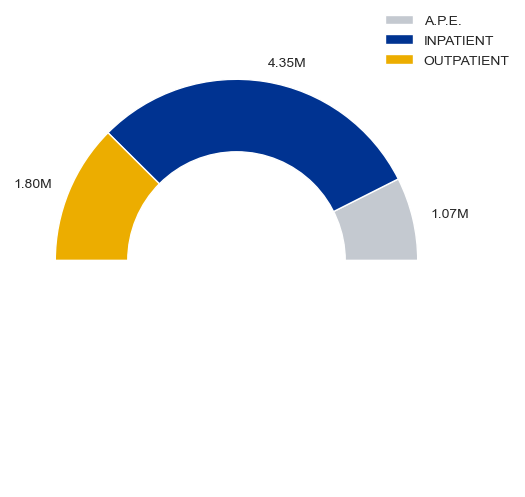

In [13]:
# Set the style
sns.set_style("white")

# Prepare the data
label = cost_sum_df.index.tolist()
val = cost_sum_df.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Create dictionary to map labels to colors
label_colors = {
    'INPATIENT': '#003391',
    'OUTPATIENT': '#ECAD00',
    'PRESCRIBED MEDICINES': '#FFC107',
    'A.P.E.': '#c4c9d0',
    '': '#FFFFFF'
}

# Modify colors list using label_colors dictionary
colors = [label_colors.get(l, '#5e6770') for l in label]


# Format the values with a suffix and create a new label
formatted_values = []
for i, value in enumerate(val):
    if value >= 1e6:
        formatted_value = '{:.2f}M'.format(value/1e6)
        formatted_values.append(formatted_value)
    elif value >= 1e3:
        formatted_value = '{:.2f}K'.format(value/1e3)
        formatted_values.append(formatted_value)
    else:
        formatted_value = '{:.2f}'.format(value)
        formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()


In [14]:
# Summary of cost by member type
memtype_df = df.groupby('MEMBER TYPE')['CLAIM AMOUNT'].sum()
print(memtype_df)

MEMBER TYPE
Dependent    3069316.85
Principal    4155323.02
Name: CLAIM AMOUNT, dtype: float64


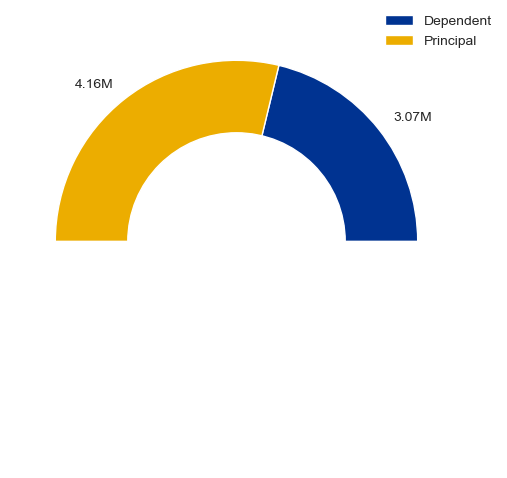

In [15]:
# Set the style
sns.set_style("white")

# Prepare the data
label = memtype_df.index.tolist()
val = memtype_df.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Modify colors list using label_colors dictionary
colors = ['#003391','#ECAD00','white']

# Format the values with a suffix and create a new label
formatted_values = []
for i, value in enumerate(val):
    if value >= 1e6:
        formatted_value = '{:.2f}M'.format(value/1e6)
        formatted_values.append(formatted_value)
    elif value >= 1e3:
        formatted_value = '{:.2f}K'.format(value/1e3)
        formatted_values.append(formatted_value)
    else:
        formatted_value = '{:.2f}'.format(value)
        formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()

In [16]:
# Summary of cost by transaction type
transacttype = df.groupby('Transaction Type')['CLAIM AMOUNT'].sum()
print(transacttype)

Transaction Type
NETWORK          6308801.89
REIMBURSEMENT     915837.98
Name: CLAIM AMOUNT, dtype: float64


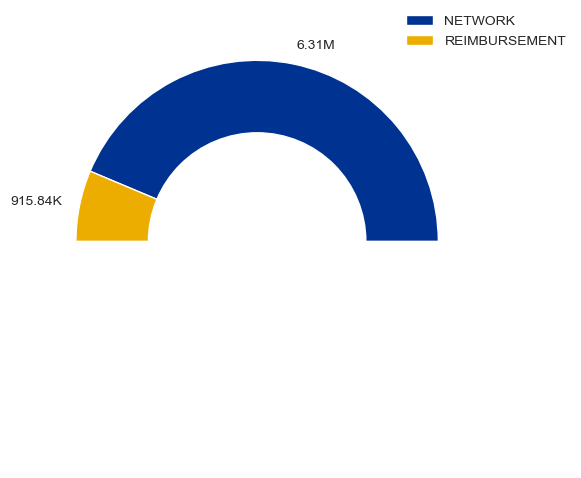

In [17]:
# Set the style
sns.set_style("white")

# Prepare the data
label = transacttype.index.tolist()
val = transacttype.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Modify colors list using label_colors dictionary
colors = ['#003391','#ECAD00','white']

# Format the values with a suffix and create a new label
formatted_values = []
for i, value in enumerate(val):
    if value >= 1e6:
        formatted_value = '{:.2f}M'.format(value/1e6)
        formatted_values.append(formatted_value)
    elif value >= 1e3:
        formatted_value = '{:.2f}K'.format(value/1e3)
        formatted_values.append(formatted_value)
    else:
        formatted_value = '{:.2f}'.format(value)
        formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()


In [18]:
# Number of claims by claim type
claim_count = df.groupby('CLAIM TYPE')['CLAIM NO'].nunique()
print(claim_count)

CLAIM TYPE
A.P.E.          47
INPATIENT      234
OUTPATIENT    1302
Name: CLAIM NO, dtype: int64


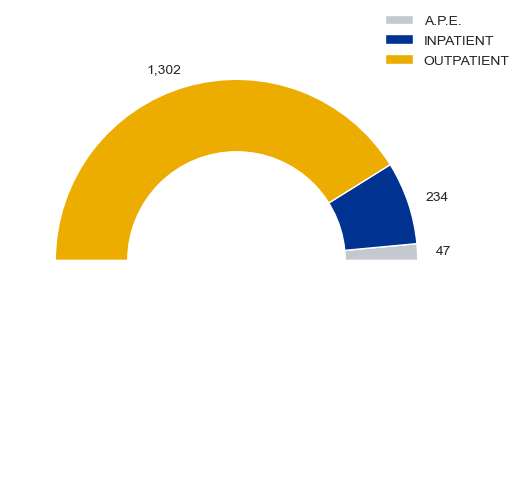

In [19]:
# Set the locale to use commas as the thousands separator
locale.setlocale(locale.LC_ALL, '')


# Set the style
sns.set_style("white")

# Prepare the data
label = claim_count.index.tolist()
val = claim_count.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Create dictionary to map labels to colors
label_colors = {
    'INPATIENT': '#003391',
    'OUTPATIENT': '#ECAD00',
    'PRESCRIBED MEDICINES': '#FFC107',
    'A.P.E.': '#c4c9d0',
    '': '#FFFFFF'
}

# Modify colors list using label_colors dictionary
colors = [label_colors.get(l, '#5e6770') for l in label]


# Format the values with a comma and create a new label
formatted_values = []
for i, value in enumerate(val):
    formatted_value = locale.format_string('%d', value, grouping=True)
    formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()


In [20]:
# Number of claims by member type
claim_memtype = df.groupby('MEMBER TYPE')['CLAIM NO'].nunique()
print(claim_memtype)

MEMBER TYPE
Dependent    713
Principal    870
Name: CLAIM NO, dtype: int64


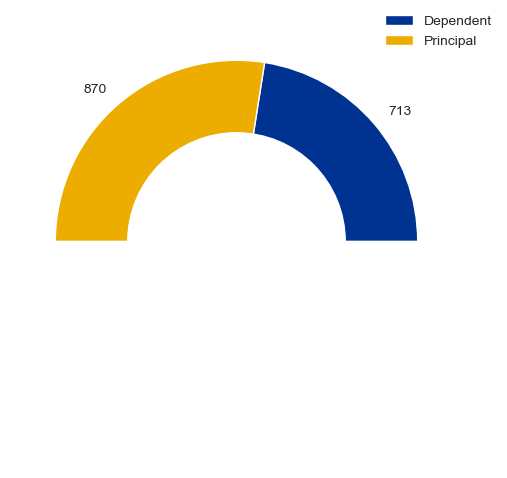

In [21]:
# Set the style
sns.set_style("white")

# Prepare the data
label = claim_memtype.index.tolist()
val = claim_memtype.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Modify colors list using label_colors dictionary
colors = ['#003391','#ECAD00','white']

# Format the values with a comma and create a new label
formatted_values = []
for i, value in enumerate(val):
    formatted_value = locale.format_string('%d', value, grouping=True)
    formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()


In [22]:
# Number of claims by transaction type
claim_transaction = df.groupby('Transaction Type')['CLAIM NO'].nunique()
print(claim_transaction)

Transaction Type
NETWORK          1429
REIMBURSEMENT     154
Name: CLAIM NO, dtype: int64


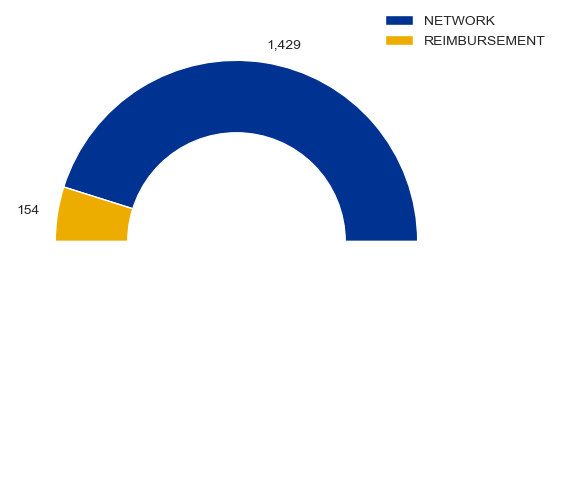

In [23]:
# Set the style
sns.set_style("white")

# Prepare the data
label = claim_transaction.index.tolist()
val = claim_transaction.tolist()

# Append data and assign color
label.append("")
val.append(sum(val))  # 50% blank

# Modify colors list using label_colors dictionary
colors = ['#003391','#ECAD00','white']

# Format the values with a comma and create a new label
formatted_values = []
for i, value in enumerate(val):
    formatted_value = locale.format_string('%d', value, grouping=True)
    formatted_values.append(formatted_value)

formatted_values[-1] = ''  # Replace last element with an empty string

# Remove the last element from the label list
label.pop()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Create the pie chart
ax.pie(val, labels=formatted_values, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a legend
ax.legend(label, frameon=False, bbox_to_anchor=(0.8, 0.9))

plt.show()


---

- Summarise Monthly Trends in a Pandas DataFrame
<br><br>
    - To summarise monthly trends in a Pandas DataFrame, we will convert a date column to a datetime format using <code>pd.to_datetime()</code>. We will then group the data by month and calculate the sum of a specified numerical column using <code>groupby()</code> and <code>sum()</code>, creating a new DataFrame with columns for the date, the sum of the numerical column, and an abbreviated month name. The DataFrame will be sorted by the date column to ensure correct month order. Next, we will group the data by month again and calculate the count of unique values in a specified column using <code>groupby()</code> and <code>nunique()</code>, creating a second DataFrame with columns for the date, the count of unique values, and an abbreviated month name. This DataFrame will also be sorted by the date column. Finally, we will merge the two DataFrames into a single DataFrame that includes the monthly sum and count data, as well as the abbreviated month names. This process of summarising and aggregating the data by month can help to identify seasonal patterns or trends that may not be immediately visible in the raw data.

In [24]:
# convert the date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# group the data by month and sum the CLAIM AMOUNT column
monthly_cost = df.groupby(pd.Grouper(key='Date', freq='M'))['CLAIM AMOUNT'].sum()

# create a new DataFrame for the monthly cost data
monthly_cost_df = monthly_cost.to_frame().reset_index()

# create a new column for the abbreviated month names
monthly_cost_df['Month'] = monthly_cost_df['Date'].dt.strftime('%b')

# sort the DataFrame by the date column to ensure correct month order
monthly_cost_df = monthly_cost_df.sort_values('Date')

# group the data by month and count the unique CLAIM NUMBER
monthly_count = df.groupby(pd.Grouper(key='Date', freq='M'))['CLAIM NO'].nunique()

# create a new DataFrame for the monthly count data
monthly_count_df = monthly_count.to_frame().reset_index()

# create a new column for the abbreviated month names
monthly_count_df['Month'] = monthly_count_df['Date'].dt.strftime('%b')

# sort the DataFrame by the date column to ensure correct month order
monthly_count_df = monthly_count_df.sort_values('Date')

# merge the monthly cost and monthly count DataFrames
monthly_data = pd.merge(monthly_cost_df, monthly_count_df, on=['Date', 'Month'])

In [25]:
monthly_data

,Date,CLAIM AMOUNT,Month,CLAIM NO
0,2021-11-30,187899.33,Nov,32
1,2021-12-31,972495.71,Dec,65
2,2022-01-31,527260.99,Jan,107
3,2022-02-28,434365.97,Feb,95
4,2022-03-31,795228.73,Mar,178
5,2022-04-30,595926.72,Apr,146
6,2022-05-31,902249.06,May,149
7,2022-06-30,476358.59,Jun,161
8,2022-07-31,421040.55,Jul,165
9,2022-08-31,919567.13,Aug,211


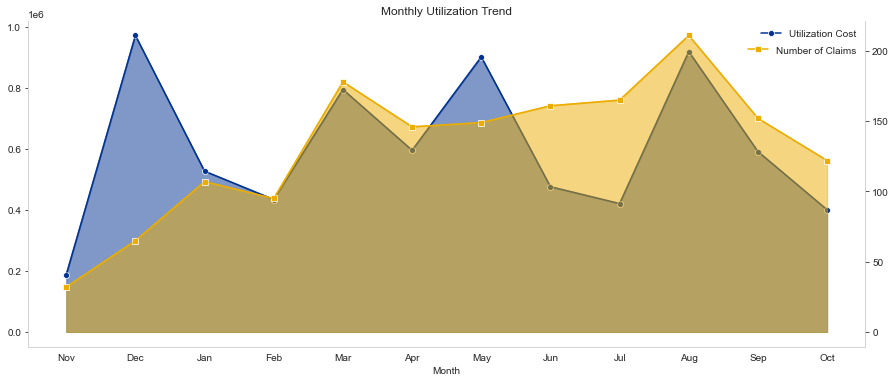

In [26]:
# Create the line chart
sns.set_style("white", {"grid": False,"axes.edgecolor": "#D3D3D3"})
fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Month", y="CLAIM AMOUNT", data=monthly_data, ax=ax1, color='#003391', label='Utilization Cost', marker='o')
ax2 = ax1.twinx()
sns.lineplot(x="Month", y="CLAIM NO", data=monthly_data, ax=ax2, color='#ECAD00', label='Number of Claims', marker='s')

# Fill area under Utilization Cost line with gradient color
sns.lineplot(x="Month", y="CLAIM AMOUNT", data=monthly_data, ax=ax1, color='#003391', alpha=0.5)
ax1.fill_between(monthly_data['Month'], monthly_data['CLAIM AMOUNT'], color='#003391', alpha=0.5)

# Fill area under Number of Claims line with gradient color
sns.lineplot(x="Month", y="CLAIM NO", data=monthly_data, ax=ax2, color='#ECAD00', alpha=0.5)
ax2.fill_between(monthly_data['Month'], monthly_data['CLAIM NO'], color='#ECAD00', alpha=0.5)

# Set the labels and titles
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.title('Monthly Utilization Trend')

# Reset the legend for Utilization Cost
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right',frameon=False,facecolor='white')

# Add legend for Number of Claims and stack in lower right
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.95),frameon=False,facecolor='white')

# Remove the top border
sns.despine(top=True, left=False, right=False)

plt.show()


**2. Summarise Top Illnesses/Diagnoses and the Most Utilised Healthcare Providers by Claim Category**

- Aggregate data in a Pandas DataFrame by grouping rows based on a specified column using <code>groupby()</code>. Calculate summary statistics for each group using <code>agg()</code>, and rename columns as necessary using <code>rename()</code>. Sort the resulting DataFrame by a specified column, and select the top n rows using <code>head()</code>. This process can be useful for summarising and identifying key features in a dataset.
<br><br>
- We will create a bar plot using Seaborn's <code>barplot()</code> function, passing in the data to plot, the x and y columns, and the desired color. We will also set the plot's figure size using the <code>rc</code> (run configuration) parameter. We will then set the plot's labels and title using matplotlib's <code>xlabel()</code>, <code>ylabel()</code>, and <code>title()</code> functions. Finally, we will use <code>plt.show()</code> to display the plot. This process can be used to visualize and explore data, and to communicate trends and patterns in a clear and effective way.

In [27]:
# Select only inpatient claims and group by illness
inpatient_data = df[df['CLAIM TYPE'] == 'INPATIENT']
grouped_by_illness = inpatient_data.groupby('ILLNESS').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique'})
# Change column heading for CLAIM NO
grouped_by_illness.columns = ['CLAIM AMOUNT', 'Number of Claims']
# Sort by claim amount and get top 10
top_10_inpatient_illness = grouped_by_illness.sort_values('CLAIM AMOUNT', ascending=False).head(10)
top_10_inpatient_illness.head(10)

,CLAIM AMOUNT,Number of Claims
ILLNESS,,
COVID-19,375845.72,25
Dengue fever [classical dengue],280539.20,13
"Pneumonia, unspecified",230609.55,10
Essential (primary) hypertension,167217.64,8
"Disorder of lipoprotein metabolism, unspecified",112621.18,2
"Acute appendicitis, unspecified",110092.01,2
Non-insulin-dependent diabetes mellitus,104837.00,2
"Viral meningitis, unspecified",102000.00,1
Cerebral meninges,102000.00,1


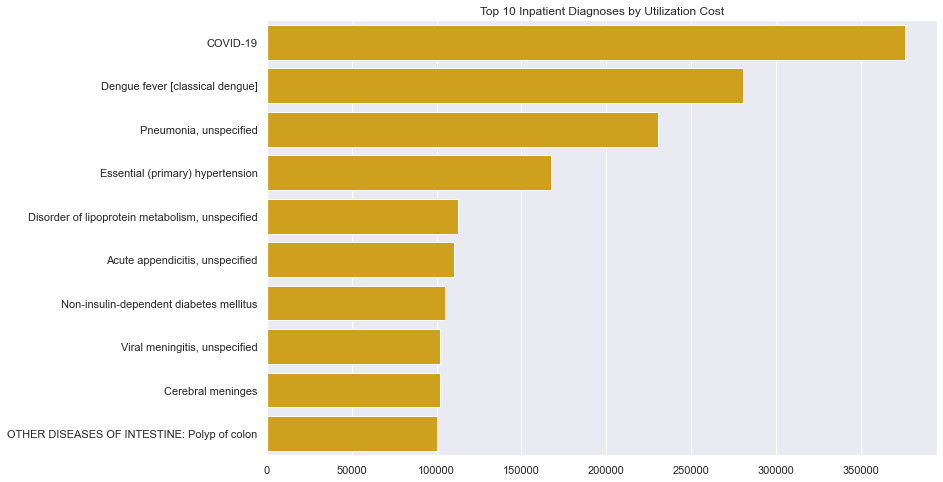

In [28]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,8)})
sns.barplot(y=top_10_inpatient_illness.index, x='CLAIM AMOUNT', data=top_10_inpatient_illness, color='#ECAD00')

# Set the labels and titles
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Inpatient Diagnoses by Utilization Cost')

plt.show()

In [29]:
# Select only outpatient claims and group by illness
outpatient_data = df[df['CLAIM TYPE'] == 'OUTPATIENT']
grouped_by_illness = outpatient_data.groupby('ILLNESS').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique'})
# Change column heading for CLAIM NO
grouped_by_illness.columns = ['CLAIM AMOUNT', 'Number of Claims']
# Sort by claim amount and get top 10
top_10_outpatient_illness = grouped_by_illness.sort_values('CLAIM AMOUNT', ascending=False).head(10)
top_10_outpatient_illness.head(10)

,CLAIM AMOUNT,Number of Claims
ILLNESS,,
Essential (primary) hypertension,282767.19,141
COVID-19,236360.39,103
Non-insulin-dependent diabetes mellitus,165590.69,86
"Disorder of lipoprotein metabolism, unspecified",56841.15,15
"Hyperlipidaemia, unspecified",49227.44,33
General medical examination,41194.59,35
Person with feared complaint in whom no diagnosis is made,39030.00,66
"Thyrotoxicosis, unspecified",31685.06,7
Thyrotoxicosis with diffuse goitre,29914.50,6


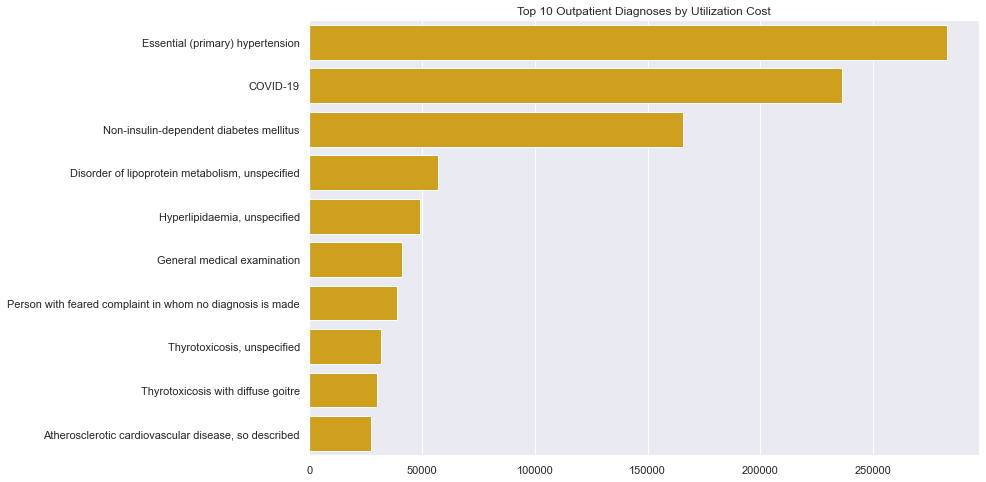

In [30]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,8)})
sns.barplot(y=top_10_outpatient_illness.index, x='CLAIM AMOUNT', data=top_10_outpatient_illness, color='#ECAD00')

# Set the labels and titles
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Outpatient Diagnoses by Utilization Cost')

plt.show()

In [31]:
# Filter data to payee type 'Network/Hospital'
network_hospital_data = inpatient_data[inpatient_data['PAYEE TYPE'] != 'REIMBURSEMENT']

# Group by Provider Name and calculate total CLAIM AMOUNT
grouped_by_ip_provider = network_hospital_data.groupby('PAYEE NAME').agg({'CLAIM AMOUNT': 'sum','CLAIM NO': 'nunique'})

# Change column heading for CLAIM NO
grouped_by_ip_provider.columns = ['CLAIM AMOUNT', 'Number of Claims']

top_10_ip_providers = grouped_by_ip_provider.sort_values('CLAIM AMOUNT', ascending=False).head(10)

# Reset the index and rename 'Payee' to 'Provider Name'
top_10_ip_providers = top_10_ip_providers.reset_index().rename(columns={'PAYEE NAME': 'Provider Name'})

top_10_ip_providers

,Provider Name,CLAIM AMOUNT,Number of Claims
0,MAKATI MEDICAL CENTER,401397.78,20
1,MANILA MED (MEDICAL CENTER MANILA),240951.58,10
2,MANILA DOCTORS HOSPITAL,223926.63,15
3,ST. LUKE'S MEDICAL CENTER-GLOBAL CITY,139019.12,4
4,"METRO ANTIPOLO HOSPITAL AND MEDICAL CENTER, INC.",102000.00,1
5,DR. FE DEL MUNDO MEDICAL CENTER,92065.83,2
6,JECSONS MEDICAL CENTER,91837.68,1
7,"GENTRI MEDICAL CENTER AND HOSPITAL, INC.",90944.10,2
8,PROVIDENCE HOSPITAL INC.,89395.06,2
9,CHINESE GENERAL HOSPITAL AND MEDICAL CENTER,88066.76,2


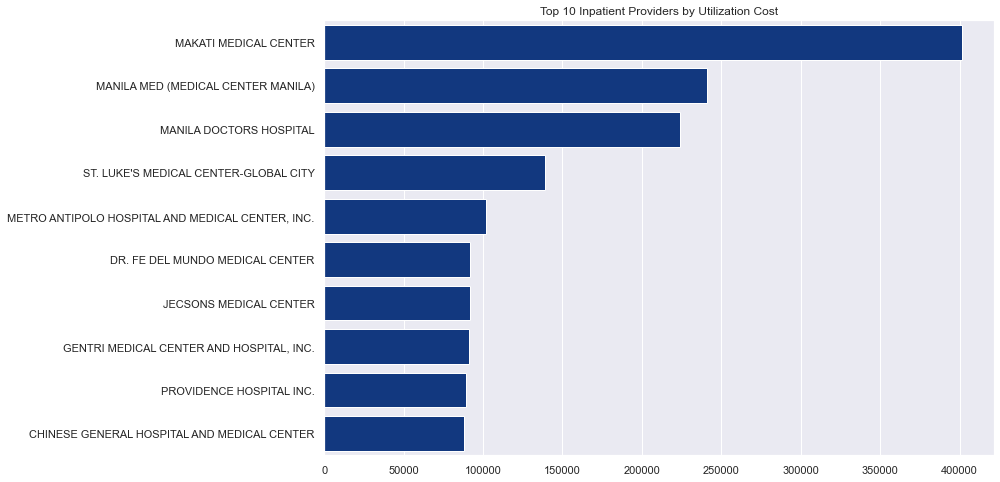

In [32]:
# Create the bar chart
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,8)})
ax = sns.barplot(x='CLAIM AMOUNT', y='Provider Name', data=top_10_ip_providers, color='#003391')

# Set the labels and title
ax.set(xlabel='', ylabel='')
ax.set_title('Top 10 Inpatient Providers by Utilization Cost')

plt.show()

In [33]:
# Filter data to payee type 'Network/Hospital'
network_hospital_data = outpatient_data[outpatient_data['PAYEE TYPE'] != 'REIMBURSEMENT']

# Group by Provider Name and calculate total CLAIM AMOUNT
grouped_by_op_provider = network_hospital_data.groupby('PAYEE NAME').agg({'CLAIM AMOUNT': 'sum','CLAIM NO': 'nunique'})

# Change column heading for CLAIM NO
grouped_by_op_provider.columns = ['CLAIM AMOUNT', 'Number of Claims']

top_10_op_providers = grouped_by_op_provider.sort_values('CLAIM AMOUNT', ascending=False).head(10)

# Reset the index and rename 'Payee' to 'Provider Name'
top_10_op_providers = top_10_op_providers.reset_index().rename(columns={'PAYEE NAME': 'Provider Name'})

top_10_op_providers

,Provider Name,CLAIM AMOUNT,Number of Claims
0,MEDICAL CLINIC-RCBC,124490.00,136
1,"PROSER HEALTH SERVICES, INC",99677.71,48
2,MAKATI MEDICAL CENTER,57339.00,15
3,CHINESE GENERAL HOSPITAL & MEDICAL CENTER,48762.02,21
4,"PROSER HEALTH SERVICES, INC.",45633.74,71
5,MANILA DOCTORS HOSPITAL,31174.80,14
6,PROVIDENCE HOSPITAL INC.,29424.00,15
7,ALLIED CARE EXPERTS(ACE)MEDICAL CENTER - VALEN...,28194.00,15
8,HI-PRECISION DIAGNOSTICS- LACSON BRANCH,23087.00,12
9,"MEDICAL CENTER OF TAGUIG CITY, INC.",22907.25,10


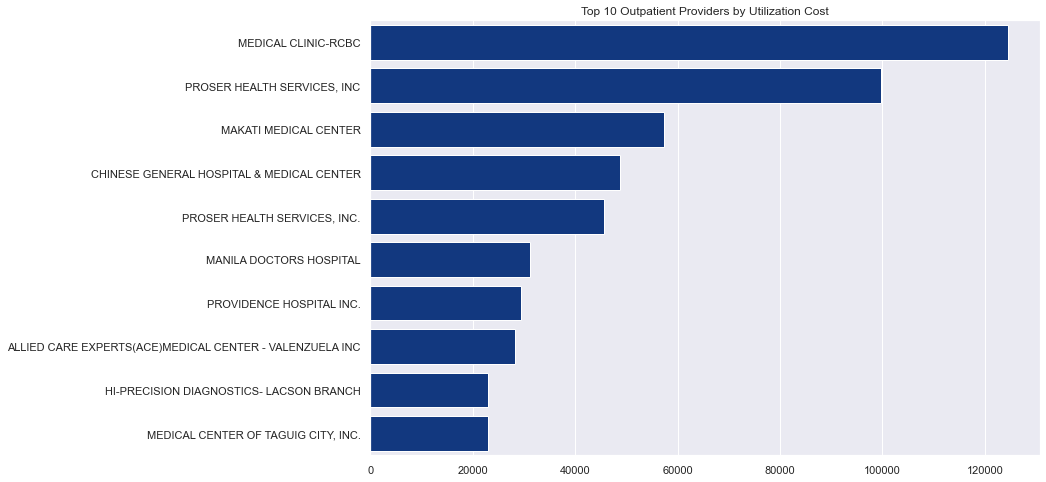

In [34]:
# Create the bar chart
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,8)})
ax = sns.barplot(x='CLAIM AMOUNT', y='Provider Name', data=top_10_op_providers, color='#003391')

# Set the labels and title
ax.set(xlabel='', ylabel='')
ax.set_title('Top 10 Outpatient Providers by Utilization Cost')

plt.show()

The code will form the basis of our executable code as we develop a report generator with a dashboard. Although the dashboard will not be interactive when it is imported into an Excel file, it will provide valuable insights through data analysis and visualisation. Our goal is to create a robust reporting tool that can be used to make data-driven decisions and facilitate effective communication of key metrics. Additionally, we aim to automate various data analysis tasks and streamline our workflows by utilising Python libraries to quickly summarise, visualise, and gain insights from complex data sets. By leveraging the power of these libraries, we can enable faster decision making and more informed actions, adding value to the business through increased efficiency and productivity.